## Basic Workflow

This notebook demonstrates how to perform a simple reconciliation

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('..')
from optima_tb.project import Project
from optima_tb.utils import odict
from optima_tb.plotting import plotResult
from optima_tb.defaults import defaultOptimOptions
import optima_tb.plotting as oplt
import optima_tb.plotting2 as oplt2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from optima_tb.plotting2 import plotSeries, PlotData



Optima TB: a TB optimization and analysis tool
Copyright (C) 2017 by the Optima Consortium



First, we will load in the cascade and databook, and do a simulation run with and without programs before reconciliation:

In [2]:
cascade = '../../tb-ucl-analyses/belarus/Cascade Spreadsheets/cascade-belarus.xlsx'
databook = '../../tb-ucl-analyses/belarus/Databook Spreadsheets/databook-belarus.xlsx'
proj= Project(name = 'Belarus', cascade_path = cascade, validation_level = 'avert', plotting_level = 'dev')
proj.loadSpreadsheet(databook_path=databook)
parset = proj.makeParset(name='default')
progset = proj.makeProgset(name='default-progset')
parset_results = proj.runSim(parset_name='default', plot=False)
options = defaultOptimOptions(settings=proj.settings, progset=proj.progsets[0])
default_results = proj.runSim(parset_name='default', progset_name='default-progset', options=options)
parset_results.name = 'Parset'
default_results.name = 'Progset before reconciliation'

03-04-18 15:05:29    INFO     Loading settings
03-04-18 15:05:29    INFO     Validation settings: avert
03-04-18 15:05:29    INFO     Loading plotting settings: dev
03-04-18 15:05:29    INFO     The cascade was validated successfully!
03-04-18 15:05:29    INFO     Created settings based on cascade: ../../tb-ucl-analyses/belarus/Cascade Spreadsheets/cascade-belarus.xlsx
03-04-18 15:05:29    INFO     Created project: Belarus
03-04-18 15:05:29    INFO     Attempting to load databook ../../tb-ucl-analyses/belarus/Databook Spreadsheets/databook-belarus.xlsx
03-04-18 15:05:30    INFO     Created ParameterSet: default
03-04-18 15:05:30    INFO     Created ProgramSet: default-progset
03-04-18 15:05:30    INFO     Initiating a standard run of project "Belarus" (i.e. without the influence of programs).
03-04-18 15:05:32    INFO     Elapsed time for running Belarus model: 2.102 s
03-04-18 15:05:35    INFO     Elapsed time for running Belarus model: 2.712 s


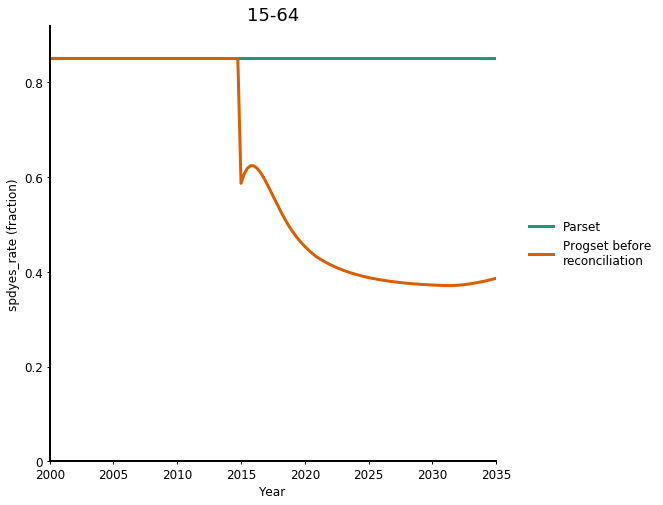

In [56]:
d = PlotData([parset_results,default_results],outputs=['spdyes_rate'], pops=['15-64'])
plotSeries(d,axis='results');

Reconciliation is performed specifically at the reconciliation year, which is typically the year when the programs first become active. In this plot, the aim of reconciliation is to reduce the large drop in the year 2015. We will set this up by specifying the reconciliation options, including

- `reconcile_for_year` which specifies the reconciliation year
- `unitcost_sigma` and `attribute_sigma` which specifies how large a change is permitted for each of the program unit costs and attributes, as a fraction of the current value
- `impact_pars` which is a list of which program impact parameters to consider when fitting the unit cost and attributes - when set to `None`, all of the impacts in the `ProgramSet` will be used

In [57]:
from optima_tb.reconciliation import reconcile
parset_name='default'
progset_name = 'default-progset'
reconcile_for_year=2015
unitcost_sigma=0.5
attribute_sigma=0.5
budget_sigma = 0.0
impact_pars=None

Now, we will perform reconciliation by calling the `reconcile` function

In [59]:
reconciled_progset,outcome = reconcile(proj,parset_name,progset_name,reconcile_for_year,impact_pars=None,unitcost_sigma=unitcost_sigma, attribute_sigma=attribute_sigma, budget_sigma = budget_sigma,max_time=10)

03-04-18 17:09:16    INFO     Initiating a standard run of project "Belarus" (i.e. without the influence of programs).
03-04-18 17:09:17    INFO     Elapsed time for running Belarus model: 1.028 s
03-04-18 17:09:19    INFO     Elapsed time for running Belarus model: 1.482 s


     step 1 (0.0 s) ++ (orig: 55.059 | best:55.059 | new:55.045 | diff:-0.013458)
     step 2 (0.1 s) -- (orig: 55.059 | best:55.045 | new:55.305 | diff:0.25992)
     step 3 (0.1 s) ++ (orig: 55.059 | best:55.045 | new:55.019 | diff:-0.026595)
     step 4 (0.1 s) ++ (orig: 55.059 | best:55.019 | new:54.570 | diff:-0.44896)
     step 5 (0.2 s) ++ (orig: 55.059 | best:54.570 | new:54.568 | diff:-0.0012815)
     step 6 (0.2 s) ++ (orig: 55.059 | best:54.568 | new:54.568 | diff:-0.000085468)
     step 7 (0.2 s) -- (orig: 55.059 | best:54.568 | new:54.582 | diff:0.013458)
     step 8 (0.3 s) ++ (orig: 55.059 | best:54.568 | new:54.532 | diff:-0.035808)
     step 9 (0.3 s) ++ (orig: 55.059 | best:54.532 | new:54.322 | diff:-0.21085)
     step 10 (0.3 s) -- (orig: 55.059 | best:54.322 | new:54.322 | diff:0)
     step 11 (0.4 s) -- (orig: 55.059 | best:54.322 | new:54.323 | diff:0.0016579)
     step 12 (0.4 s) -- (orig: 55.059 | best:54.322 | new:54.322 | diff:0)
     step 13 (0.4 s) ++ (orig:

     step 106 (3.8 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 107 (3.8 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 108 (3.8 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 109 (3.8 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 110 (3.9 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 111 (3.9 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 112 (3.9 s) ++ (orig: 55.059 | best:47.075 | new:47.075 | diff:-0.00027649)
     step 113 (4.0 s) -- (orig: 55.059 | best:47.075 | new:47.075 | diff:0)
     step 114 (4.0 s) -- (orig: 55.059 | best:47.075 | new:47.079 | diff:0.0043372)
     step 115 (4.0 s) ++ (orig: 55.059 | best:47.075 | new:47.074 | diff:-0.00020687)
     step 116 (4.1 s) -- (orig: 55.059 | best:47.074 | new:47.075 | diff:0.00084248)
     step 117 (4.1 s) ++ (orig: 55.059 | best:47.074 | new:47.061 | diff:-0.013147)
     step 118 (4.1 s) -- (orig: 55.059 | be

     step 210 (7.1 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 211 (7.1 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 212 (7.2 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 213 (7.2 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 214 (7.2 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 215 (7.3 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 216 (7.3 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 217 (7.3 s) ++ (orig: 55.059 | best:46.868 | new:46.868 | diff:-0.0000026398)
     step 218 (7.4 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 219 (7.4 s) ++ (orig: 55.059 | best:46.868 | new:46.868 | diff:-0.0000039597)
     step 220 (7.4 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0.00000044466)
     step 221 (7.5 s) -- (orig: 55.059 | best:46.868 | new:46.868 | diff:0)
     step 222 (7.5 s) -- (orig: 55.059 | best:46.868

Diagnostic output is returned in the `outcome` variable, which shows for each parameter the discrepancy between the pre-reconciliation and post-reconciliation values compared to the parset, and a summary of the residual (sum of squared differences). Note that the reconciliation algorithm incorporates an additional penalty for programs being overfunded (with coverage $>1$) so the residual displayed in the `outcome` string may be different to the objective value printed out by `reconcile()`

In [64]:
print outcome

Population      Parameter           Parset     Initial                 Reconciled     
0-4             v_rate              0.9700     0.3575 (   -0.6125)     0.4294 (   -0.5406)
0-4             lteyes_rate         0.0000     0.0010 (   +0.0010)     0.0010 (   +0.0010)
0-4             lteno_rate          0.0000     0.0000 (   +0.0000)     0.0000 (   +0.0000)
0-4             ltesuc_rate         0.0000     0.0000 (   +0.0000)     0.0000 (   +0.0000)
0-4             ltlyes_rate         0.0000     0.0010 (   +0.0010)     0.0010 (   +0.0010)
0-4             ltlno_rate          0.0000     0.0000 (   +0.0000)     0.0000 (   +0.0000)
0-4             ltlsuc_rate         0.0000     0.0000 (   +0.0000)     0.0000 (   +0.0000)
0-4             spddiag_rate        0.5602     0.2983 (   -0.2619)     0.4267 (   -0.1335)
0-4             spdyes_rate         0.8500     0.5851 (   -0.2649)     0.7896 (   -0.0604)
0-4             spdno_rate          0.0365     0.0322 (   -0.0043)     0.0295 (   -0.0069)
0-4

After creating the `Project`, we need to load in the databook. Note that the databook is matched to the cascade, in that the quantities entered into the databook must correspond to the properties defined in the cascade. If you don't already have a databook, you can make one using the Project object:

In [61]:
reconciled_results = proj.runSim(parset_name=parset_name, progset=reconciled_progset, options=options, plot=False)
reconciled_results.name = 'Progset after reconciliation'

03-04-18 17:09:40    INFO     Elapsed time for running Belarus model: 2.677 s


We can visually confirm that the reconciliation has improved the parameters:

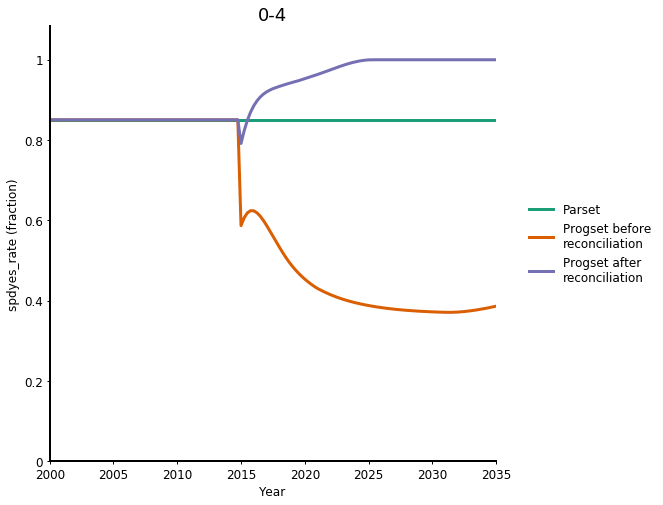

In [65]:
d = PlotData([parset_results,default_results,reconciled_results],outputs=['spdyes_rate'], pops=['0-4'])
plotSeries(d,axis='results');

Notice that the discrepancy between the parset and program values in 2015 is considerably reduced. However, note also that discrepancies after the reconciliation year are not considered by the reconciliation algorithm.